#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [6]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [7]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################

In [8]:
#pip install pydotplus

In [9]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [10]:
df0 = pd.read_csv('car_evaluation_0.csv')
df1 = pd.read_csv('car_evaluation_1.csv')
df2 = pd.read_csv('car_evaluation_2.csv')
df3 = pd.read_csv('car_evaluation_3.csv')

df = pd.concat([df0, df1, df2, df3], ignore_index = True)

print(df.tail())

     buyPrice maintCost noDoors noPersons bootLuggage safety decision
1722      low       low   5more      more         med    med     good
1723      low       low   5more      more         med   high    vgood
1724      low       low   5more      more         big    low    unacc
1725      low       low   5more      more         big    med     good
1726      low       low   5more      more         big   high    vgood


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df['buyPrice'].value_counts()

buyPrice
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

In [13]:
df['maintCost'].value_counts()

maintCost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64

In [14]:
df['noDoors'].value_counts()

noDoors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64

In [15]:
df['noPersons'].value_counts()

noPersons
4       576
more    576
2       575
Name: count, dtype: int64

In [16]:
df['bootLuggage'].value_counts()

bootLuggage
med      576
big      576
small    575
Name: count, dtype: int64

In [17]:
df['safety'].value_counts()

safety
med     576
high    576
low     575
Name: count, dtype: int64

In [18]:
df['decision'].value_counts()

decision
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [19]:
df.replace(to_replace=["low", "med", "high", "vhigh"], value=[1,2,3,4], inplace=True)

In [20]:
df.replace(to_replace=["small", "big"], value=[1, 3], inplace=True)

In [21]:
df.replace(to_replace=["2", "3", "4", "5more", "more"], value=[2,3,4,5,5], inplace=True)

In [22]:
df.replace(to_replace=["unacc", "acc", "good", "vgood"], value=[1,2,3,4], inplace=True)

In [23]:
df

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1
...,...,...,...,...,...,...,...
1722,1,1,5,5,2,2,3
1723,1,1,5,5,2,3,4
1724,1,1,5,5,3,1,1
1725,1,1,5,5,3,2,3


In [24]:
X = df.drop('decision', axis=1).values

In [25]:
y = df['decision'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1554, 6)
(1554,)
(173, 6)
(173,)


In [28]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf_entropy.fit(X_train, y_train)

In [29]:
#feature_name = df.drop('decision', axis=1).columns

feature_name = df.columns[:-1]
target_name = df.columns[-1]

print(feature_name)
print(target_name)


Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object')
decision


In [42]:
dot_data = 'tree_grid_clf_entropy.dot'  

#dot_data = StringIO()

tree.export_graphviz(
    clf_entropy,
    out_file=dot_data,
    feature_names=feature_name,  
    #class_names=[target_name],
    filled=True,
)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [43]:
display(Image(dot_data, unconfined=True))

#Image(graph.create_png())



TypeError: 'module' object is not callable

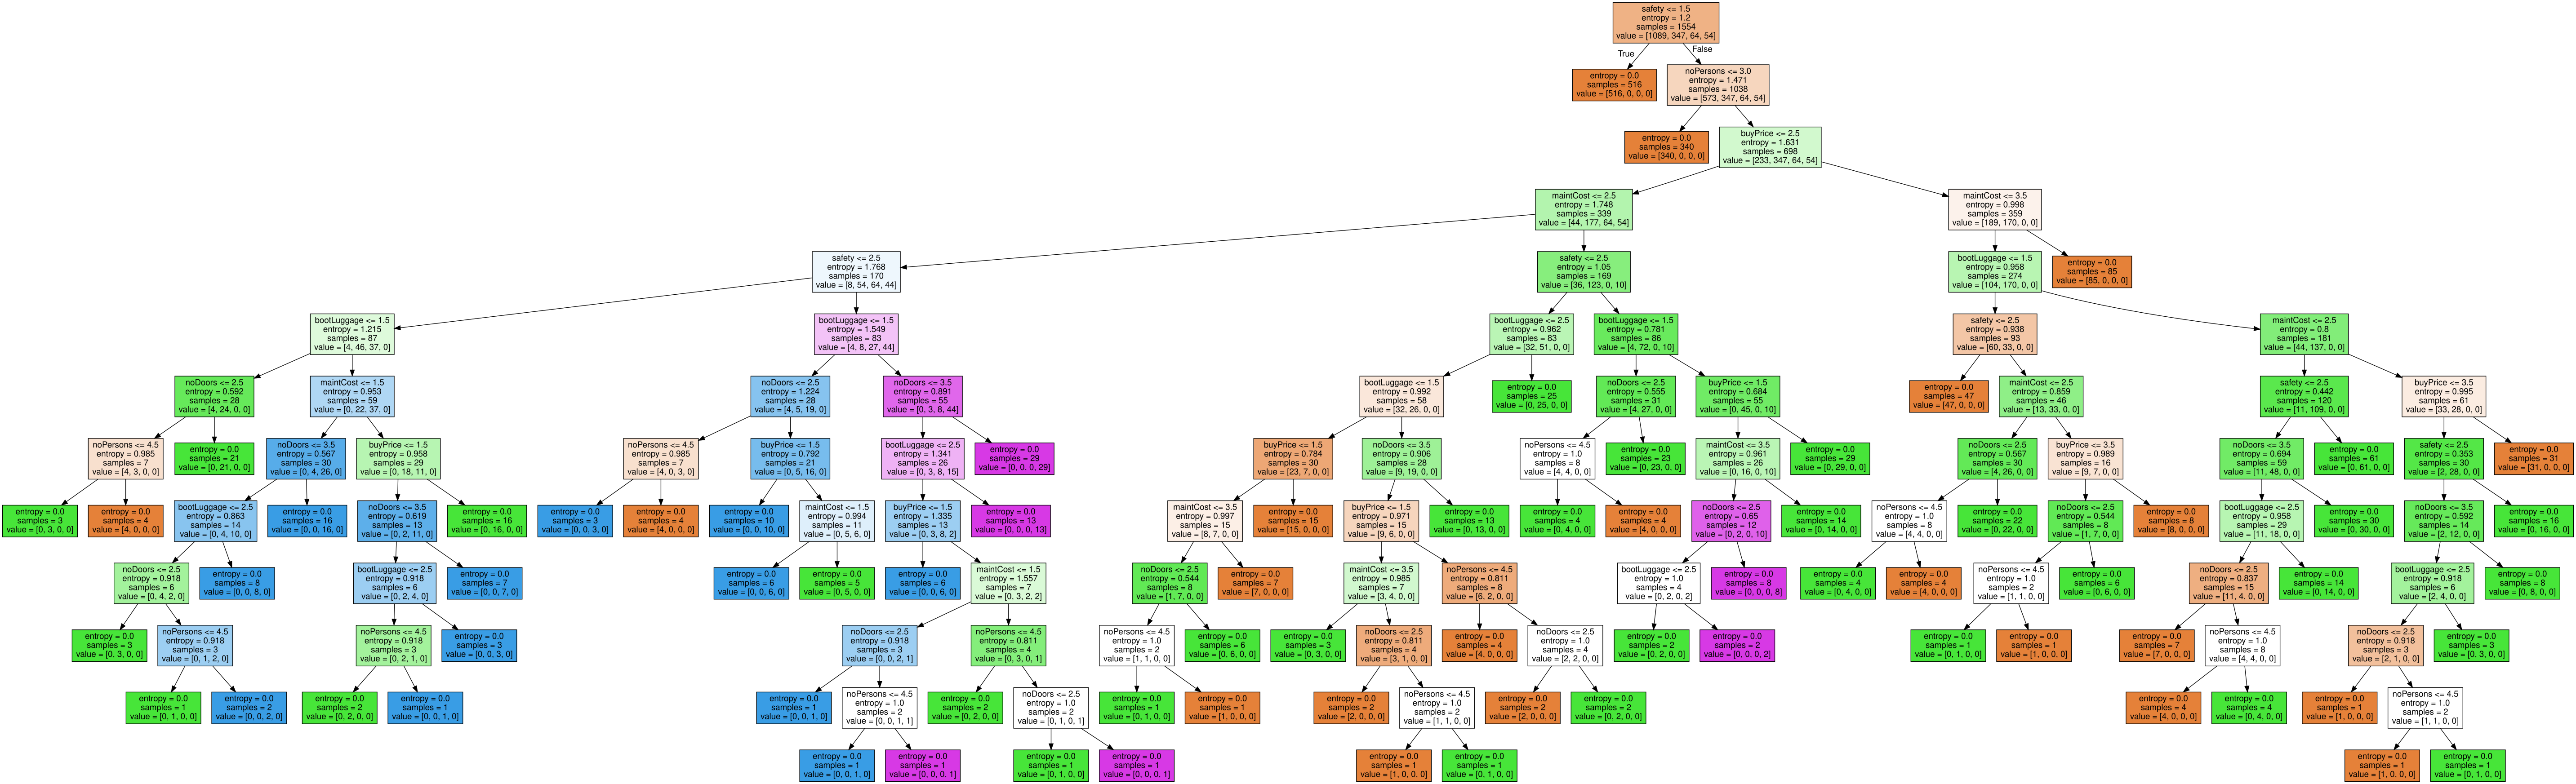

In [1]:
from PIL import Image
from IPython.display import display

img = Image.open('tree_grid_clf_entropy.png')

display(img)